# Contours

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

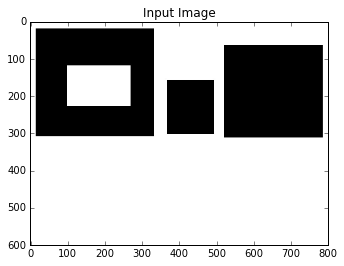

In [2]:
# Let's load a simple image with 3 black squares
image = cv2.imread('../../images/shapes_donut.jpg')

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Input Image')
cv2.imwrite('input_image.jpg', image)

plt.show()

Number of Contours found = 8


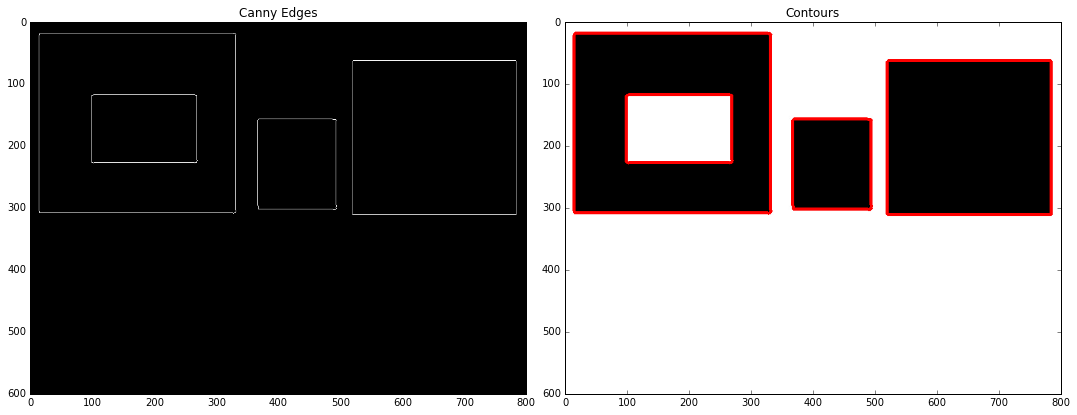

In [3]:
# Grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

row, col = 1, 2
fig, axs = plt.subplots(row, col, figsize=(15, 10))
fig.tight_layout()
 
# Find Canny edges
edged = cv2.Canny(gray, 30, 200)
axs[0].imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
axs[0].set_title('Canny Edges')
cv2.imwrite('canny_edges.jpg', edged)

# Finding Contours
# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print("Number of Contours found = " + str(len(contours)))

# Draw all contours
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,0,255), 3)
axs[1].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[1].set_title('Contours')
cv2.imwrite('contour_image.jpg', image)

plt.show()

**cv2.findContours(image, Retrieval Mode, Approximation Method)**

Returns -> contours, hierarchy

**NOTE** In OpenCV 3.X, findContours returns a 3rd argument which is ret (or a boolean indicating if the function was successfully run). 

If you're using OpenCV 3.X replace line 12 with:

_, contours, hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

The variable 'contours' are stored as a numpy array of (x,y) points that form the contour

While, 'hierarchy' describes the child-parent relationships between contours (i.e. contours within contours)



#### Approximation Methods

Using cv2.CHAIN_APPROX_NONE stores all the boundary points. But we don't necessarily need all bounding points. If the points form a straight line, we only need the start and ending points of that line.

Using cv2.CHAIN_APPROX_SIMPLE instead only provides these start and end points of bounding contours, thus resulting in much more efficent storage of contour information..